In [1]:
from scipy.spatial import distance
import numpy as np
import pandas as pd

import time
from memory_profiler import memory_usage

## [PART 1]: Read Data

In [2]:
dataset_name = '1063'
timesplit = '1m'
window_len = '120'
step_size = '60'

dataset_folder = f'{dataset_name}_{timesplit}_winlen_{window_len}_stepsize_{step_size}'
dataset_path = f'/home/cc/clio/drift-detection/output/{dataset_folder}/{dataset_folder}.csv'

In [3]:
data = pd.read_csv(dataset_path)
data

,iops_ks_distance,iops_ks_p_val,iops_ks_label,iops_cvm_distance,iops_cvm_p_val,iops_cvm_label,read_write_ratio_ks_distance,read_write_ratio_ks_p_val,read_write_ratio_ks_label,read_write_ratio_cvm_distance,...,write_size_ratio_cvm_p_val,write_size_ratio_cvm_label,bandwidth_ks_distance,bandwidth_ks_p_val,bandwidth_ks_label,bandwidth_cvm_distance,bandwidth_cvm_p_val,bandwidth_cvm_label,start,end
0,0.233333,2.347090e-03,0,1.402917,2.848629e-04,0,0.158333,0.088290,0,0.445347,...,0.019201,0,0.241667,1.435816e-03,0,1.499722,1.710405e-04,0,0,120
1,0.191667,2.097888e-02,0,0.693403,1.318554e-02,0,0.075000,0.863287,2,0.072847,...,0.200942,0,0.200000,1.402340e-02,0,0.684375,1.387034e-02,0,60,180
2,0.258333,5.089932e-04,0,1.352222,3.724024e-04,0,0.175000,0.044556,0,0.642986,...,0.615114,0,0.225000,3.768592e-03,0,1.175278,9.539125e-04,0,120,240
3,0.108333,4.505034e-01,0,0.172847,3.285738e-01,0,0.158333,0.088290,0,0.635833,...,0.107334,0,0.100000,5.521961e-01,0,0.127500,4.689925e-01,0,180,300
4,0.275000,1.677401e-04,0,1.392639,3.007522e-04,0,0.216667,0.005944,0,0.927639,...,0.281688,0,0.275000,1.677401e-04,0,1.587014,1.081531e-04,0,240,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.300000,2.761754e-05,0,2.201667,4.430128e-06,0,0.208333,0.009211,0,0.584306,...,0.001155,0,0.325000,3.836313e-06,0,2.401528,1.581672e-06,0,12360,12480
207,0.075000,8.632875e-01,2,0.045347,9.092928e-01,2,0.083333,0.767580,0,0.081997,...,0.654296,0,0.075000,8.632875e-01,2,0.061806,8.083820e-01,2,12420,12540
208,0.433333,9.273566e-11,0,4.154236,2.095024e-10,0,0.183333,0.030841,0,0.483403,...,0.028278,0,0.416667,5.990097e-10,0,3.759931,1.610912e-09,0,12480,12600
209,0.258333,5.089932e-04,0,1.351944,3.729503e-04,0,0.116667,0.359647,0,0.095434,...,0.417552,0,0.241667,1.435816e-03,0,1.134514,1.186306e-03,0,12540,12660


In [4]:
characteristics_path = f'/home/cc/clio/runs/raw/tencent/characteristic/{dataset_name}/{timesplit}/characteristic.csv'
characteristics = pd.read_csv(characteristics_path)

characteristics

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,44447,2.016100e+00,5.999894e+04,ms,59996.9210,34562,9885,0.7776,0.2224,3.4964,...,3.729411,4.979147e+00,5.848400e+00,6.968832e+00,1.098852e+01,1.596411e+01,5.030692e+01,7.842878e+02,1.282984e+03,1.282984e+03
1,39680,6.000000e+04,1.200000e+05,ms,59999.9955,30502,9178,0.7687,0.2313,3.3234,...,2.945059,3.725814e+00,4.258084e+00,4.950336e+00,7.663061e+00,1.241583e+01,8.160057e+01,1.343748e+03,2.195862e+03,2.195862e+03
2,54722,1.200000e+05,1.799998e+05,ms,59999.7992,41966,12756,0.7669,0.2331,3.2899,...,2.796691,3.563230e+00,4.093643e+00,4.786423e+00,7.564615e+00,1.211197e+01,4.439708e+01,6.563327e+02,1.569220e+03,1.569220e+03
3,60007,1.800000e+05,2.399997e+05,ms,59999.7043,42857,17150,0.7142,0.2858,2.4990,...,2.620251,3.331978e+00,3.795400e+00,4.382209e+00,6.372092e+00,8.842269e+00,1.951834e+01,2.683413e+02,1.615427e+03,1.615427e+03
4,61624,2.400000e+05,2.999997e+05,ms,59999.6803,45108,16516,0.7320,0.2680,2.7312,...,3.073399,3.934619e+00,4.516861e+00,5.253314e+00,7.810037e+00,1.087408e+01,2.038680e+01,1.308700e+02,7.615399e+02,7.615399e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,12520,7.809600e+08,7.810190e+08,ms,59000.0000,10473,2047,0.8365,0.1635,5.1163,...,3.703440,5.924520e+00,7.978352e+00,1.178055e+01,4.228474e+01,1.423808e+02,1.083190e+03,2.051264e+03,2.082979e+03,2.082979e+03
12890,1008,7.810200e+08,7.810790e+08,ms,59003.7286,874,134,0.8671,0.1329,6.5224,...,280.163417,5.553309e+02,7.391129e+02,9.988252e+02,1.349384e+03,1.828370e+03,1.999763e+03,1.999771e+03,1.999771e+03,1.999776e+03
12891,2777,7.810800e+08,7.811394e+08,ms,59350.9745,2417,360,0.8704,0.1296,6.7139,...,38.923921,8.517947e+01,1.325346e+02,2.182924e+02,6.989813e+02,1.277835e+03,2.050381e+03,2.064848e+03,2.064848e+03,2.064848e+03
12892,35835,7.811400e+08,7.811998e+08,ms,59787.1000,26245,9590,0.7324,0.2676,2.7367,...,3.003849,3.766748e+00,4.260622e+00,4.888941e+00,7.348472e+00,1.204780e+01,8.057535e+01,1.183762e+03,1.835652e+03,1.835652e+03


## [Part 2] Compute Jensen-Shannon Distance

In [5]:
features = ['iops', 'read_write_ratio', 'write_size_ratio', 'bandwidth']

ref_size = 60
step = 15


In [6]:
def get_result(filtered_labels, feature):
    
    js_scores = []
    times = []
    mem_usages = []
    
    for index, row in filtered_labels.iterrows():
       
        start = row['start']
        end = row['end']
        label = row['label']
        
        row_result = {'label': label, 'start':start, 'end':end}
        
        ref_data = characteristics[feature].iloc[start:start + ref_size]
        start = start + step
        
        count = 0
        while start + ref_size <= end:

            cmp_data = characteristics[feature].iloc[start:start + ref_size]
            # js_dist = distance.jensenshannon(ref_data, cmp_data)
            
            start_time = time.time()
            mem_usage = memory_usage((distance.jensenshannon, (ref_data, cmp_data)), interval=0.01, retval=True)
            end_time = time.time()
            
            js_dist = mem_usage[1]
            exec_time = end_time - start_time
            max_mem = max(mem_usage[0])
            
            times.append(exec_time)
            mem_usages.append(max_mem)
            
            row_result[f'{count}'] = js_dist
            
            start += step
            count += 1
            
        js_scores.append(row_result)    
    
    js_score_df = pd.DataFrame(js_scores)
        
    return js_score_df, times, mem_usages
    

In [7]:
js_distance = {}
all_times = []
all_mem_usages = []

for feature in features:
    
    feature_columns = [col for col in data.columns if feature in col and 'label' in col]
    selected_columns = ['start', 'end'] + feature_columns
    selected_labels = data[selected_columns].copy()
    
    selected_labels.loc[:, 'label'] = selected_labels[feature_columns].max(axis=1)
    filtered_labels = selected_labels.loc[selected_labels['label'].isin([1, 2])]

    results, times, mem_usages = get_result(filtered_labels, feature)
    js_distance[feature] = results
    all_times.extend(times)
    all_mem_usages.extend(mem_usages)
    
# Calculate overall average time and memory usage across all features
overall_avg_time = sum(all_times) / len(all_times)
overall_avg_mem_usage = sum(all_mem_usages) / len(all_mem_usages)

print(f"\nOverall Average Execution Time: {overall_avg_time:.6f} seconds")
print(f"Overall Average Memory Usage: {overall_avg_mem_usage:.2f} MiB")

In [8]:
print(f"\nOverall Average Execution Time: {overall_avg_time:.6f} seconds")
print(f"Overall Average Memory Usage: {overall_avg_mem_usage:.2f} MiB")


Overall Average Execution Time: 0.111325 seconds
Overall Average Memory Usage: 180.45 MiB


In [9]:
js_distance['iops']

,label,start,end,0,1,2,3
0,1,480,600,0.373668,0.385192,0.288158,0.335533
1,2,720,840,0.302013,0.327748,0.315603,0.355897
2,1,1140,1260,0.140607,0.155338,0.138242,0.103925
3,1,1200,1320,0.135388,0.203549,0.235642,0.256703
4,1,1320,1440,0.319997,0.384151,0.333201,0.406559
5,1,1680,1800,0.580541,0.620339,0.568744,0.594980
6,2,2460,2580,0.370651,0.373299,0.351938,0.406417
7,1,2880,3000,0.080152,0.092680,0.097121,0.080811
8,1,2940,3060,0.070191,0.089235,0.196183,0.316746
9,1,3480,3600,0.354724,0.365917,0.292550,0.316430


## [Part 3] Evaluation

In [10]:
import matplotlib.pyplot as plt

In [11]:
index = 26
feature_name = 'iops'
num_plots = len(js_distance[feature_name].columns) - 3

data_df = js_distance[feature_name]
start = data_df['start'][index]
end = data_df['end'][index]

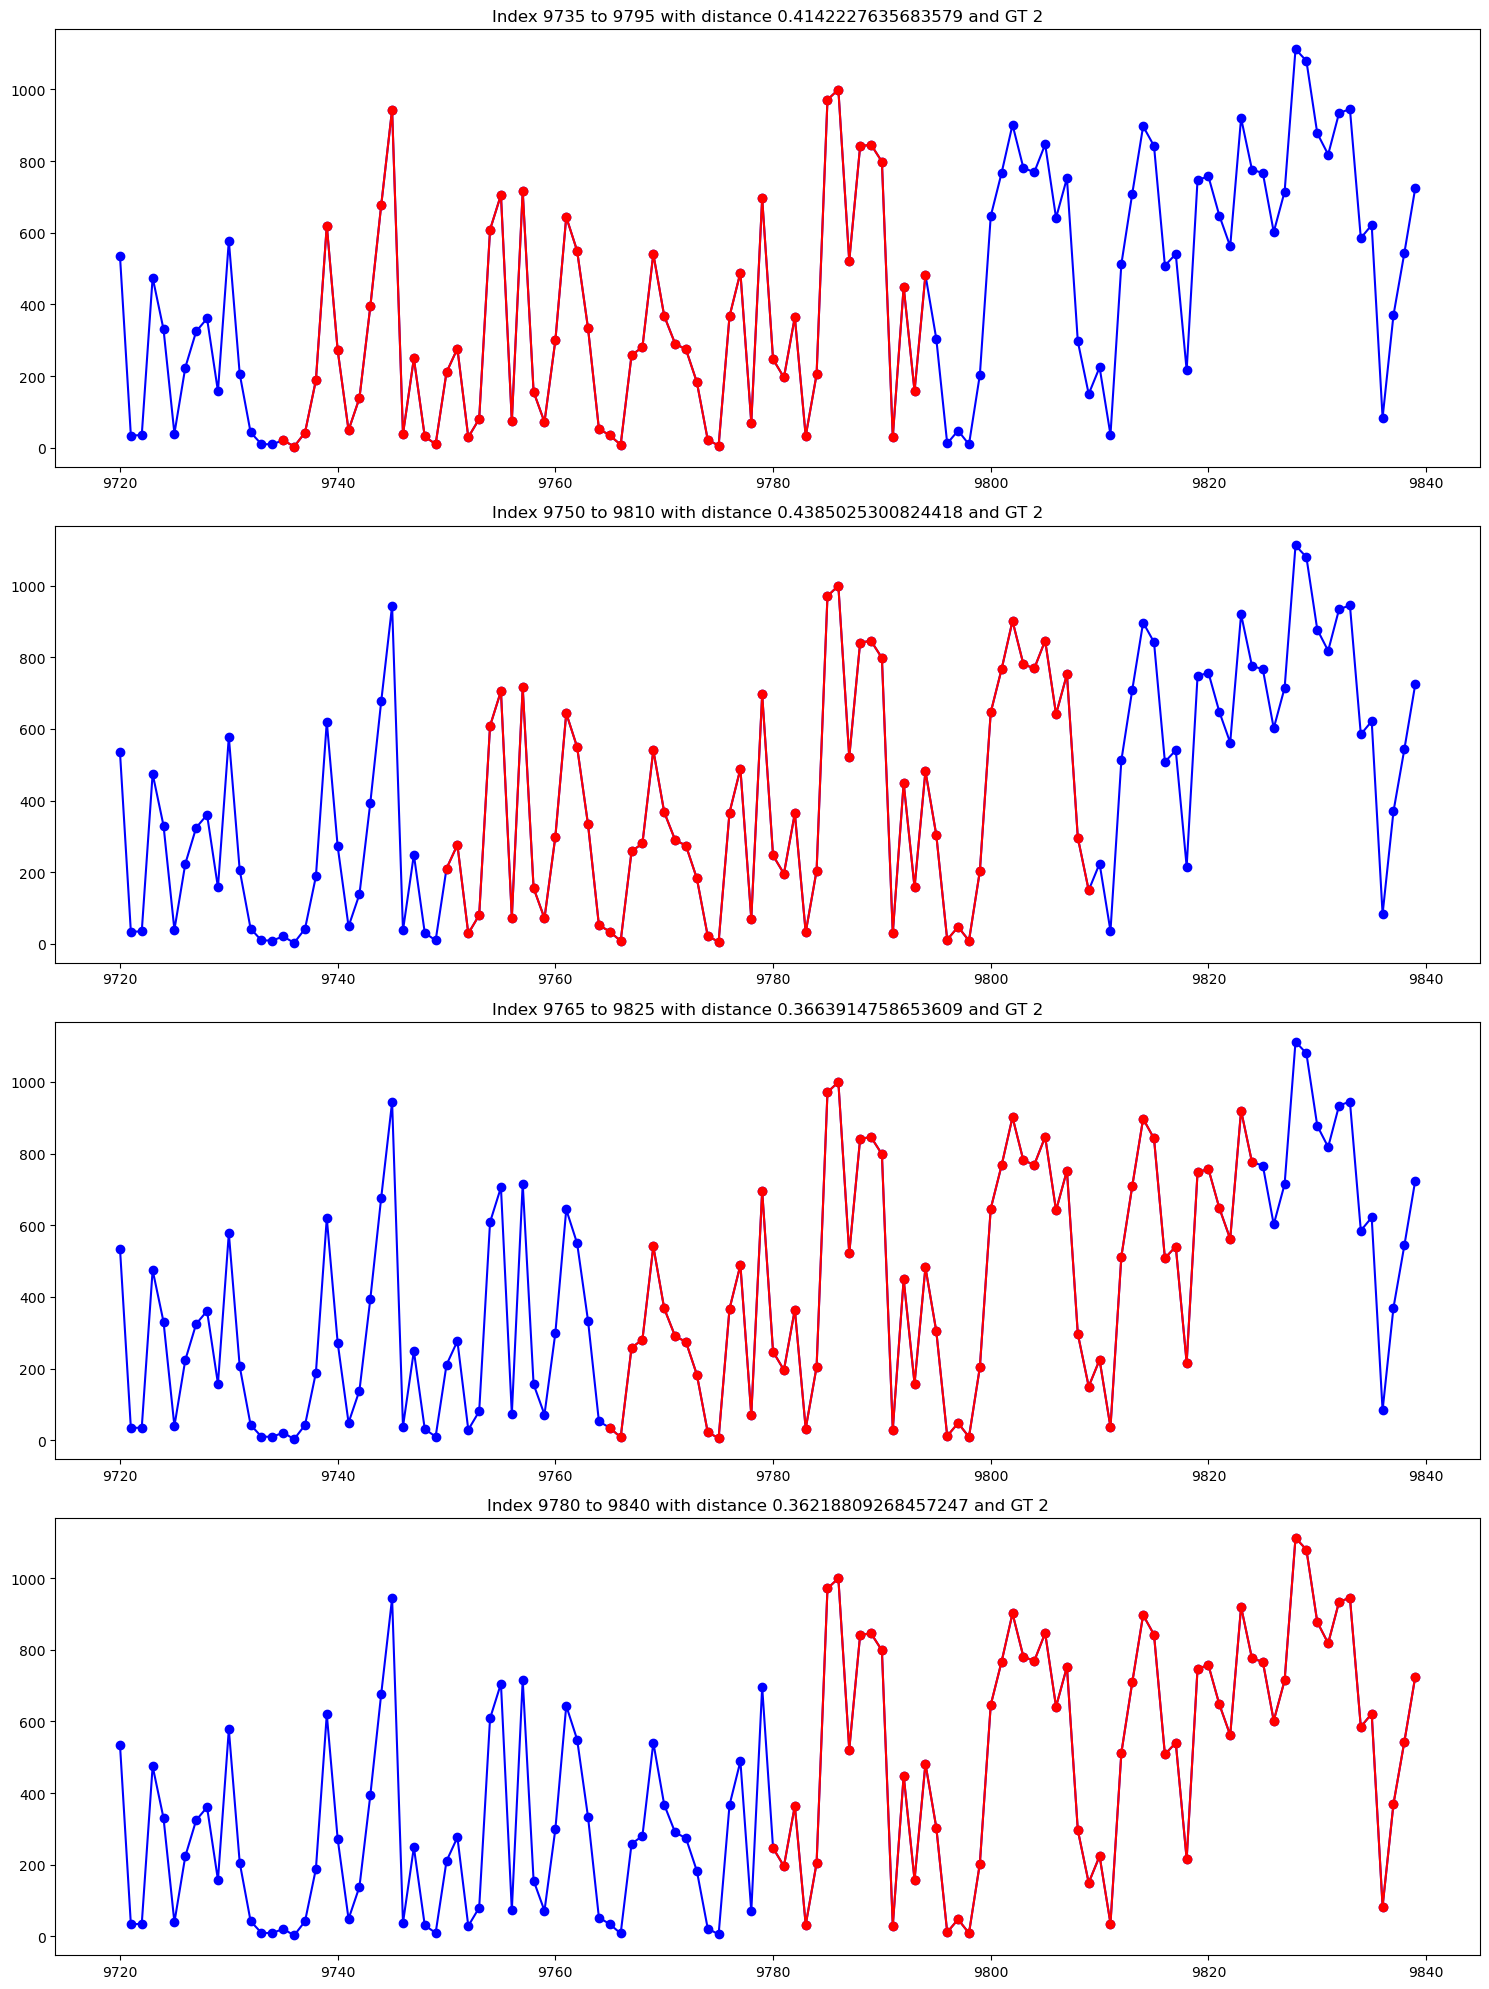

In [12]:
plt.figure(figsize=(15, 5 * num_plots))

for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(characteristics[feature_name].iloc[start:end], marker='o', linestyle='-', color='b')
    
    cmp_start = (i+1) * step + start
    cmp_end = cmp_start + ref_size
    
    plt.plot(characteristics[feature_name].iloc[cmp_start:cmp_end], marker='o', linestyle='-', color='r')
    
    gt_label = data_df['label'].iloc[index]
    plt.title(f'Index {cmp_start} to {cmp_end} with distance {data_df[str(i)].iloc[index]} and GT {gt_label}')
    
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

threshold = 0.1

In [18]:
eval_results = {}

for feature_name, data_df in js_distance.items():
    
    preds = data_df[['0', '1']].max(axis=1)
    preds_binary = preds > threshold
    
    true_labels = (data_df['label'] == 1)
    
    accuracy = accuracy_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary, average='macro', zero_division=0)
    precision = precision_score(true_labels, preds_binary, average='macro', zero_division=0)
    f1 = f1_score(true_labels, preds_binary, average='macro', zero_division=0)
    
    tn, fp, fn, tp = confusion_matrix(true_labels, preds_binary).ravel()
    
    # Store the results in the dictionary
    eval_results[feature_name] = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp,
        'true_negatives': tn
    }
    
    # Optional: Print results for each feature
    print(f"Feature: {feature_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}\n")
    

# Convert the eval_results dictionary to a DataFrame
results_df = pd.DataFrame(eval_results).T

average_metrics = results_df.mean()

# Compute the average accuracy and recall
# average_accuracy = results_df['accuracy'].mean()
# average_recall = results_df['recall'].mean()

# Print the averages
print(f"Average Accuracy: {average_metrics['accuracy']:.4f}")
print(f"Average Recall: {average_metrics['recall']:.4f}")
print(f"Average Precision: {average_metrics['precision']:.4f}")
print(f"Average F1 Score: {average_metrics['f1_score']:.4f}")
print(f"Average False Positives: {average_metrics['false_positives']:.4f}")
print(f"Average False Negatives: {average_metrics['false_negatives']:.4f}")
print(f"Average True Positives: {average_metrics['true_positives']:.4f}")
print(f"Average True Negatives: {average_metrics['true_negatives']:.4f}")

Feature: iops
Accuracy: 0.6129
Recall: 0.5773
Precision: 0.5773
F1 Score: 0.5773
False Positives: 6
False Negatives: 6
True Positives: 14
True Negatives: 5

Feature: read_write_ratio
Accuracy: 0.4000
Recall: 0.4545
Precision: 0.2083
F1 Score: 0.2857
False Positives: 14
False Negatives: 1
True Positives: 10
True Negatives: 0

Feature: write_size_ratio
Accuracy: 0.2692
Recall: 0.2857
Precision: 0.2293
F1 Score: 0.2412
False Positives: 13
False Negatives: 6
True Positives: 6
True Negatives: 1

Feature: bandwidth
Accuracy: 0.4688
Recall: 0.3917
Precision: 0.3514
F1 Score: 0.3637
False Positives: 11
False Negatives: 6
True Positives: 14
True Negatives: 1

Average Accuracy: 0.4377
Average Recall: 0.4273
Average Precision: 0.3416
Average F1 Score: 0.3670
Average False Positives: 11.0000
Average False Negatives: 4.7500
Average True Positives: 11.0000
Average True Negatives: 1.7500


/tmp/ipykernel_121829/3384678529.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='viridis')
/tmp/ipykernel_121829/3384678529.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='viridis')
/tmp/ipykernel_121829/3384678529.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=metric, data=results_df, palette='viridis')
/tmp/ipykernel_121829/3384678529.py:10: FutureWarning: 

Passing `palette` without assignin

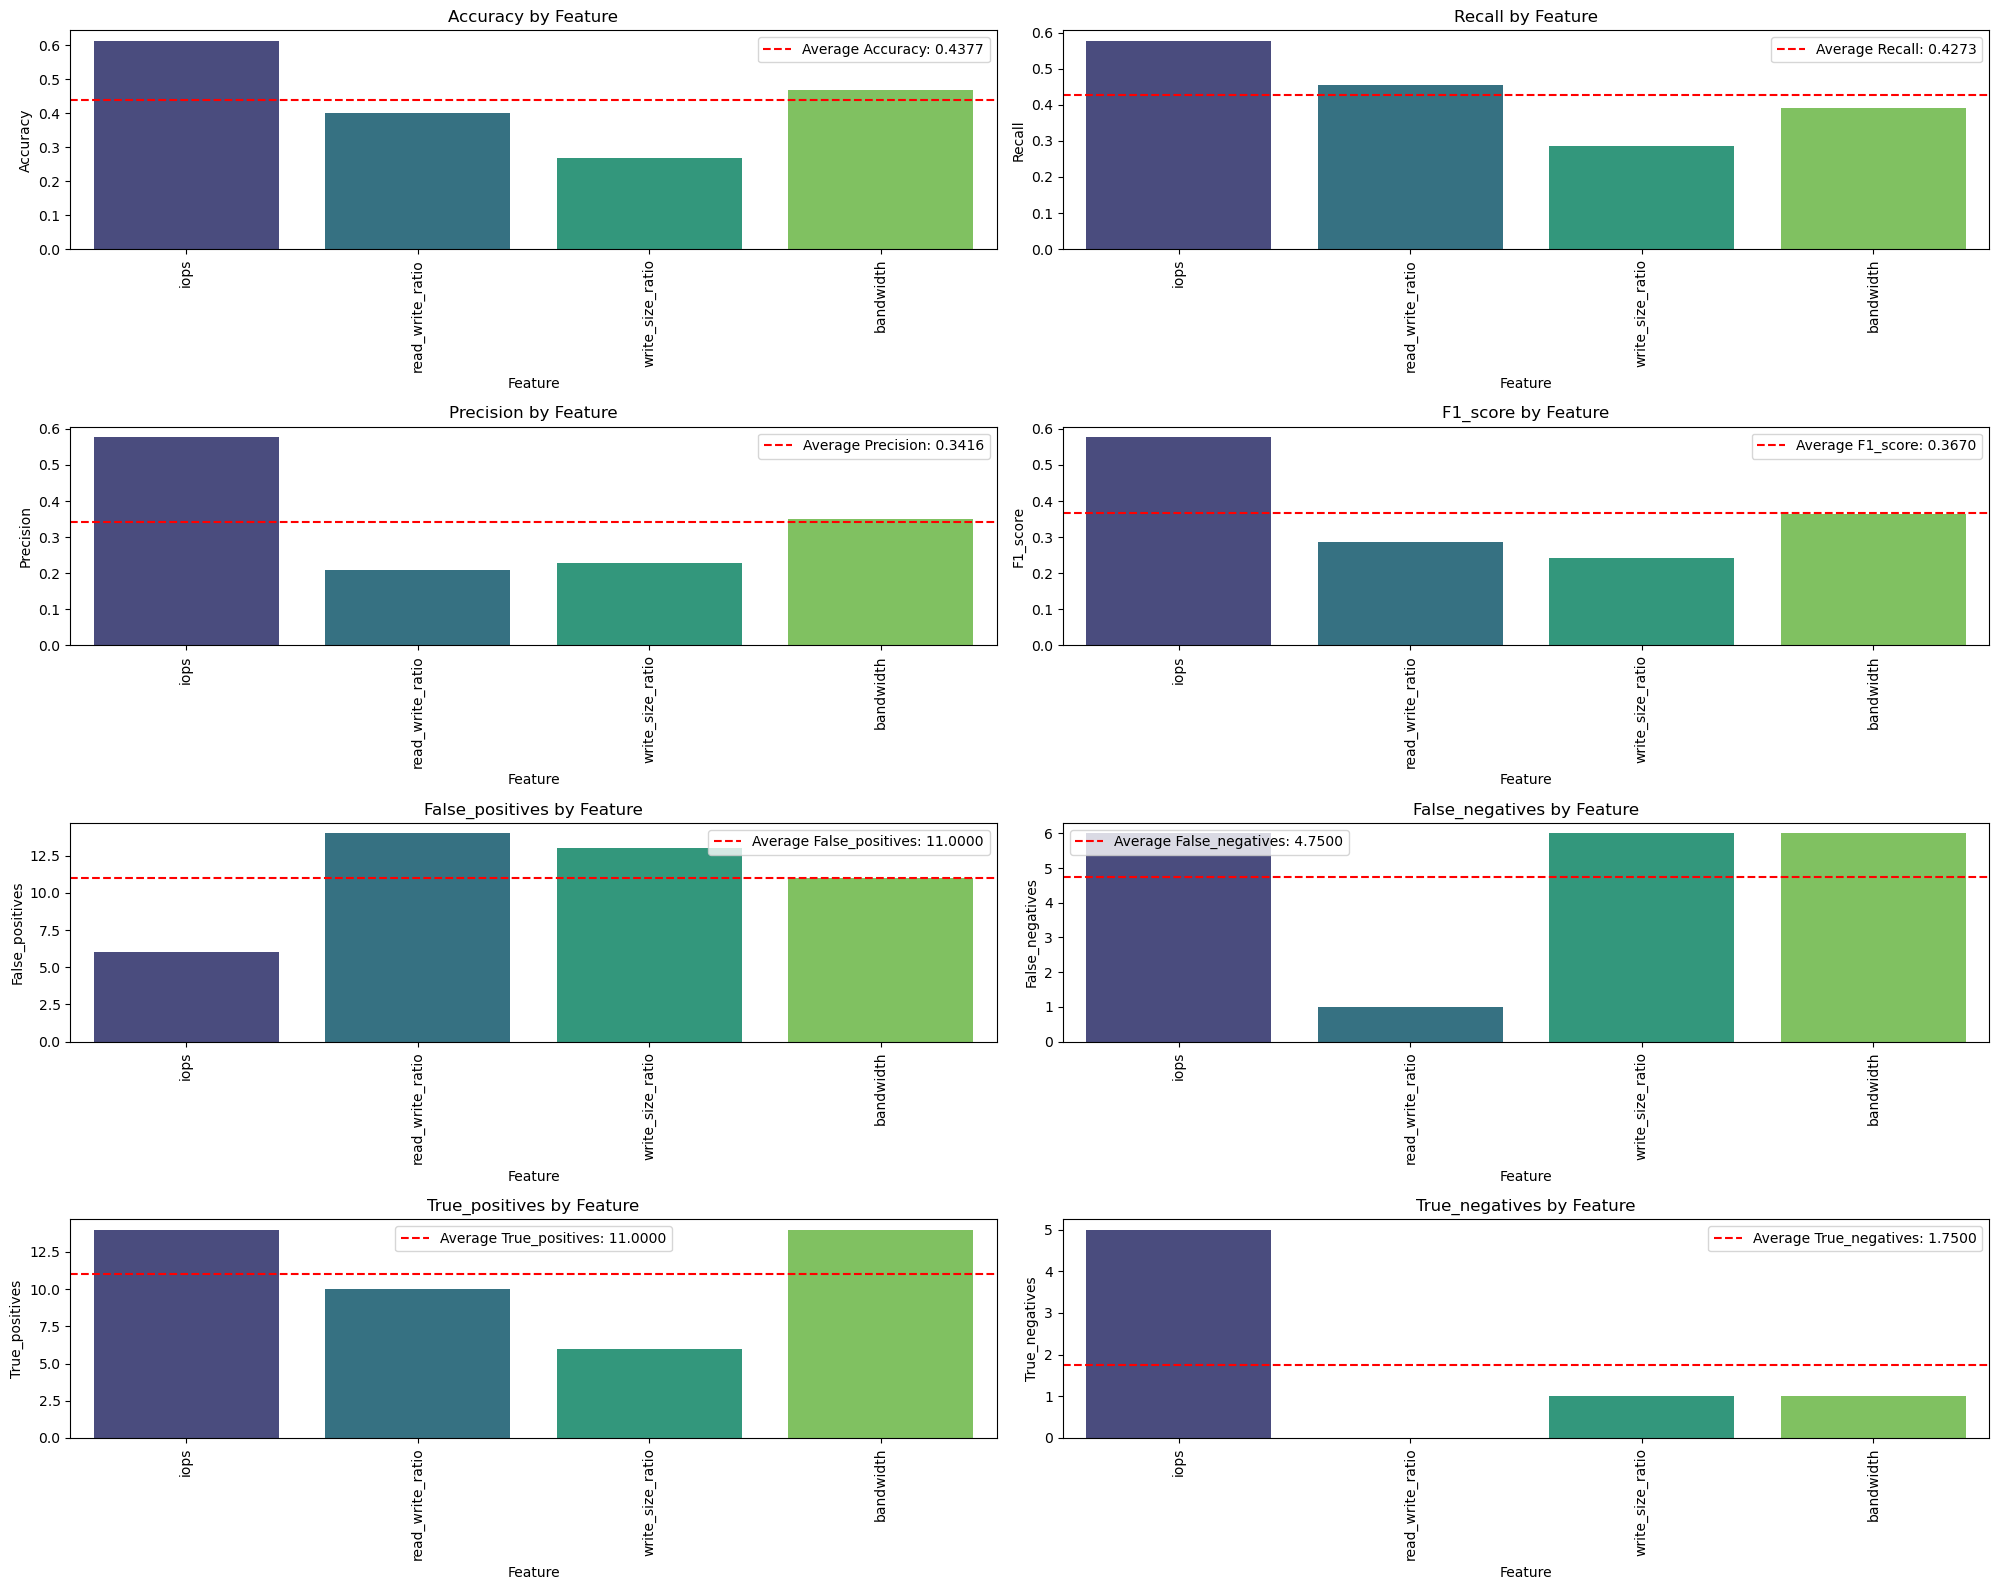

In [19]:
import seaborn as sns

metrics = ['accuracy', 'recall', 'precision', 'f1_score', 'false_positives', 'false_negatives', 'true_positives', 'true_negatives']

plt.figure(figsize=(20, 16))

# Plot each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(4, 2, i)
    sns.barplot(x=results_df.index, y=metric, data=results_df, palette='viridis')
    plt.axhline(y=average_metrics[metric], color='red', linestyle='--', label=f'Average {metric.capitalize()}: {average_metrics[metric]:.4f}')
    plt.title(f'{metric.capitalize()} by Feature')
    plt.xlabel('Feature')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=90)
    plt.legend()

# Show plots
plt.tight_layout()
plt.show()